In [3]:
cd ../analysis/

/home/jlee782/hcomp_paper_seg/analysis


In [51]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/jlee782/.local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
from utils import *
import pickle as pkl

In [44]:
sample ="15workers_rand0"
objid=1
clust_id="-1"
here = "/home/jlee782/hcomp_paper_seg/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
there = "/home/jlee782/final_segmentation/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"

In [49]:
m = pkl.load(open("pixel_em/obj1/mask201.pkl"))

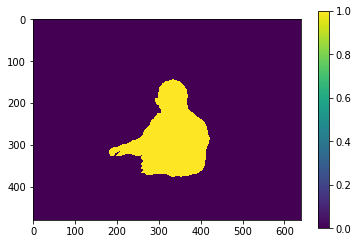

In [52]:
plt.imshow(m)
plt.colorbar()

In [46]:
print "prj now:",json.load(open(here+"basic_EM_prj_best_thresh.json"))
print "prj before:",json.load(open(there+"EM_prj_best_thresh.json"))

prj now: [0.018808499469758502, 0.20252826153376108, 0.017511590737976673]
prj before: [0.9867046899687849, 0.9778490681332112, 0.9651324965132496]


In [28]:
cat /home/jlee782/hcomp_paper_seg/analysis/pixel_em/5workers_rand0/obj1/worker_ids.json

[196, 156, 219, 201, 246]

In [21]:
cat /home/jlee782/hcomp_paper_seg/analysis/pixel_em/5workers_rand0/obj1/clust0/worker_ids.json

[196, 219, 156, 246, 201]

In [22]:
cat /home/jlee782/hcomp_paper_seg/analysis/pixel_em/5workers_rand0/obj1/clust1/worker_ids.json

[]

In [47]:
sample ="5workers_rand0"
objid=1
clust_id="-1"
here = "/home/jlee782/hcomp_paper_seg/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
there = "/home/jlee782/final_segmentation/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"

In [23]:
m = pkl.load(open("/home/jlee782/hcomp_paper_seg/analysis/pixel_em/5workers_rand0/obj1/clust0/GTLSA_gt_est_tiles_best_thresh.pkl"))

In [48]:
import json
print "prj now:",json.load(open(here+"GTLSA_EM_prj_best_thresh.json"))
print "prj before:",json.load(open(there+"GTLSA_EM_prj_best_thresh.json"))

prj now: [-1, 0.0, 0.0]
prj before: [0.9750247468209853, 0.9780782157042469, 0.9541728763040238]


In [60]:
m = pkl.load(open("/home/jlee782/hcomp_paper_seg/analysis/pixel_em/5workers_rand0/obj1/GTLSA_gt_est_tiles_best_thresh.pkl"))

In [61]:
m

set()

In [53]:
sample ="10workers_rand0"
objid=1
clust_id=-1
here = "/home/jlee782/hcomp_paper_seg/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
there = "/home/jlee782/final_segmentation/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
import json
print "here:",json.load(open(here+"GTLSA_EM_prj_best_thresh.json"))
print "there:",json.load(open(there+"GTLSA_EM_prj_best_thresh.json"))

here: [0.9913617886178862, 0.968644974029942, 0.9605377769361864]
there: [0.9941394803672592, 0.9717766575007638, 0.9662413609782031]


In [56]:
outdir+"/wo"

'pixel_em/10workers_rand7/obj22/clust1'

In [89]:
from sample_worker_seeds import sample_specs
sample_lst = sample_specs.keys()
object_lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40,41,42, 43, 44, 45, 46, 47]
def check_sample_cluster():
    df = pd.read_csv("spectral_clustering_all_hard_obj.csv")
    print "Checking that all clustered samples can reconstruct original worker list exactly"
    for sample in sample_lst:
        for objid in object_lst:
            cluster_ids = df[(df["objid"] == objid)].cluster.unique()
            if len(cluster_ids)!=0:
                outdir = tile_and_mask_dir(sample, objid, -1)
                noClust_worker_ids = json.load(open(outdir+"/worker_ids.json"))
                cluster_worker_ids = []
                Nworkers = int(sample.split("workers")[0])
                try:
                    assert len(noClust_worker_ids)==Nworkers
                except(AssertionError):
                    print "length of original cluster not equal to number of workers: "+ sample + ':' + str(objid) 
                for clust_id in list(cluster_ids):
                    worker_ids = np.array(df[(df["objid"] == objid) & (df["cluster"] == clust_id)].wid)
                    #if len(worker_ids) > 1:
                    outdir = tile_and_mask_dir(sample, objid, clust_id)    
                    worker_ids = json.load(open(outdir+"/worker_ids.json"))
                    cluster_worker_ids.extend(worker_ids)
                try:
                    assert set(noClust_worker_ids)==set(cluster_worker_ids)
                except(AssertionError):
                    print "sum of clustered worker list over all clusters not equal to original worker list"
                    print sample + ':' + str(objid) 
                    print noClust_worker_ids
                    print cluster_worker_ids


In [74]:
from PixelEM import *

/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


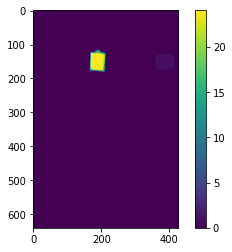

In [77]:
create_mega_mask(47, PLOT=True, sample_name='25workers_rand0', PRINT=False, EXCLUDE_BBG=True)

In [87]:
cat pixel_em/25workers_rand0/obj47/worker_ids.json

[146, 181, 156, 246, 206, 263, 220, 115, 234, 211, 9, 209, 196, 147, 199, 235, 208, 169, 126, 148, 116, 241, 82, 192, 230]

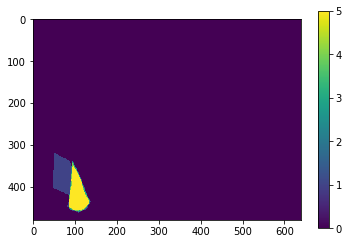

In [83]:
create_mega_mask(4, PLOT=True, sample_name='5workers_rand0', PRINT=False, EXCLUDE_BBG=True)

In [86]:
cat pixel_em/5workers_rand0/obj4/worker_ids.json

[196, 265, 208, 240, 137]

In [56]:
m = pkl.load(open(here+"/GTLSA_gt_est_tiles_best_thresh.pkl"))

In [84]:
cat pixel_em/5workers_rand0/obj4/worker_ids.json

[196, 265, 208, 240, 137]

In [57]:
m

{541,
 565,
 608,
 646,
 653,
 663,
 669,
 671,
 672,
 674,
 677,
 681,
 684,
 685,
 687,
 691,
 692,
 694,
 695,
 696,
 697,
 699,
 700,
 701,
 702,
 709,
 714,
 717,
 718,
 720,
 721,
 722,
 723,
 725,
 728,
 730,
 731,
 732,
 742,
 743,
 744,
 747,
 748,
 749,
 751,
 752,
 753,
 754,
 758,
 759,
 761,
 762,
 763,
 767,
 768,
 770,
 771,
 772,
 775,
 778,
 780,
 782,
 785,
 788,
 791,
 794,
 795,
 796,
 799,
 801,
 802,
 804,
 807,
 809,
 811,
 812,
 814,
 815,
 817,
 818,
 819,
 821,
 823,
 825,
 826,
 827,
 828,
 829,
 830,
 831,
 833,
 837,
 838,
 840,
 841,
 842,
 843,
 844,
 845,
 847,
 853,
 854,
 855,
 856,
 857,
 858,
 859,
 860,
 861,
 863,
 864,
 865,
 868,
 873,
 874,
 875,
 876,
 878,
 880,
 881,
 883,
 885,
 887,
 888,
 889,
 890,
 891,
 892,
 893,
 897,
 898,
 899,
 900,
 901,
 902,
 904,
 905,
 907,
 908,
 910,
 911,
 912,
 914,
 915,
 916,
 917,
 918,
 921,
 922,
 923,
 925,
 927,
 928,
 929,
 930,
 931,
 932,
 933,
 934,
 935,
 936,
 937,
 939,
 941,
 943,
 944,
 946

In [52]:
sample ="15workers_rand0"
objid=1
clust_id=-1
here = "/home/jlee782/hcomp_paper_seg/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
there = "/home/jlee782/final_segmentation/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
import json
print "here:",json.load(open(here+"GTLSA_EM_prj_best_thresh.json"))
print "there:",json.load(open(there+"GTLSA_EM_prj_best_thresh.json"))

here: [0.9866733428340331, 0.9783455545371219, 0.9655861289106672]
there: [0.9868998998227634, 0.9782309807516041, 0.9656914492535063]


```
5workers_rand0:27:1
Creating pixel_em/5workers_rand0/obj27/clust1/MV_tiles.pkl.
Traceback (most recent call last):
  File "initPixelAnalysis.py", line 115, in <module>
    create_MV_tiles(sample, objid, clust_id)
  File "/home/jlee782/hcomp_paper_seg/analysis/PixelEM_tile.py", line 39, in create_MV_tiles
    tiles = get_all_worker_tiles(sample, objid, clust_id)
  File "/home/jlee782/hcomp_paper_seg/analysis/utils.py", line 61, in get_all_worker_tiles
    return pickle.load(open("{}/tiles.pkl".format(outdir)))
IOError: [Errno 2] No such file or directory: 'pixel_em/5workers_rand0/obj27/clust1/tiles.pkl'
```